In [16]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv("Lawsuit.csv")
df

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,1,0,0,7.4,9,3,77836,84612
1,2,1,1,0,0,6.7,10,2,69994,78497
2,3,1,1,0,0,8.1,6,1,62872,67756
3,4,1,1,1,1,5.1,27,3,155196,173220
4,5,1,1,0,0,7.0,10,3,89268,96099
...,...,...,...,...,...,...,...,...,...,...
256,257,6,0,1,1,2.9,8,2,297174,323699
257,258,6,0,1,1,2.6,9,3,308081,339664
258,259,6,0,1,1,2.8,8,1,211269,241577
259,260,6,0,1,1,2.4,2,1,210801,233905


In [18]:
df.head()

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,1,0,0,7.4,9,3,77836,84612
1,2,1,1,0,0,6.7,10,2,69994,78497
2,3,1,1,0,0,8.1,6,1,62872,67756
3,4,1,1,1,1,5.1,27,3,155196,173220
4,5,1,1,0,0,7.0,10,3,89268,96099


In [19]:
df.tail()

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
256,257,6,0,1,1,2.9,8,2,297174,323699
257,258,6,0,1,1,2.6,9,3,308081,339664
258,259,6,0,1,1,2.8,8,1,211269,241577
259,260,6,0,1,1,2.4,2,1,210801,233905
260,261,6,0,1,1,3.2,5,1,244551,265502


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      261 non-null    int64  
 1   Dept    261 non-null    int64  
 2   Gender  261 non-null    int64  
 3   Clin    261 non-null    int64  
 4   Cert    261 non-null    int64  
 5   Prate   261 non-null    float64
 6   Exper   261 non-null    int64  
 7   Rank    261 non-null    int64  
 8   Sal94   261 non-null    int64  
 9   Sal95   261 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 20.5 KB


In [21]:
df.isnull().any()

ID        False
Dept      False
Gender    False
Clin      False
Cert      False
Prate     False
Exper     False
Rank      False
Sal94     False
Sal95     False
dtype: bool

In [37]:
df["Gender"] = df["Gender"].replace({1: 'Male', 0: 'Female'})
df["Dept"] = df["Dept"].replace({1: 'Biochemistry/Molecular Biology', 2: 'Physiology', 
                                 3: 'Genetics',4: 'Pediatrics', 5: 'Medicine', 6: 'Surgery'})

df["Clin"] = df["Clin"].replace({1: 'Primarily Clinical Emphasis', 0: 'Primarily Research Emphasis'})
df["Cert"] = df["Cert"].replace({1: 'Board certified', 0: 'Not certified'})
df["Rank"] = df["Rank"].replace({1: 'Assistant', 2: 'Associate', 3: 'Full Professor'})

df.head()



,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,7.4,9,Full Professor,77836,84612
1,2,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,6.7,10,Associate,69994,78497
2,3,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,8.1,6,Assistant,62872,67756
3,4,Biochemistry/Molecular Biology,Male,Primarily Clinical Emphasis,Board certified,5.1,27,Full Professor,155196,173220
4,5,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,7.0,10,Full Professor,89268,96099


In [32]:
df.describe()

,ID,Prate,Exper,Sal94,Sal95
count,261.00000,261.000000,261.000000,261.000000,261.000000
mean,131.00000,4.932184,10.229885,153593.344828,168906.655172
std,75.48841,1.944430,6.227176,80469.666720,88778.425411
min,1.00000,1.300000,1.000000,34514.000000,38675.000000
25%,66.00000,3.200000,6.000000,90771.000000,99972.000000
50%,131.00000,4.400000,9.000000,133284.000000,148117.000000
75%,196.00000,6.900000,14.000000,200543.000000,218955.000000
max,261.00000,8.700000,37.000000,428876.000000,472589.000000


In [34]:
df["Dept"].unique()

array(['Biochemistry/Molecular Biology', 'Physiology', 'Genetics',
       'Pediatrics', 'Medicine', 'Surgery'], dtype=object)

In [35]:
df["Rank"].unique()

array(['Full Professor', 'Associate', 'Assistant'], dtype=object)

In [42]:
df["Gender"].value_counts()

Gender
Male      155
Female    106
Name: count, dtype: int64

In [40]:
#Cinsiyete göre akademik statü dağılımı

rank_gender_counts = df.pivot_table(index="Rank", columns="Gender", aggfunc="size", fill_value=0)
print(rank_gender_counts)

Gender          Female  Male
Rank                        
Assistant           69    43
Associate           21    43
Full Professor      16    69


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

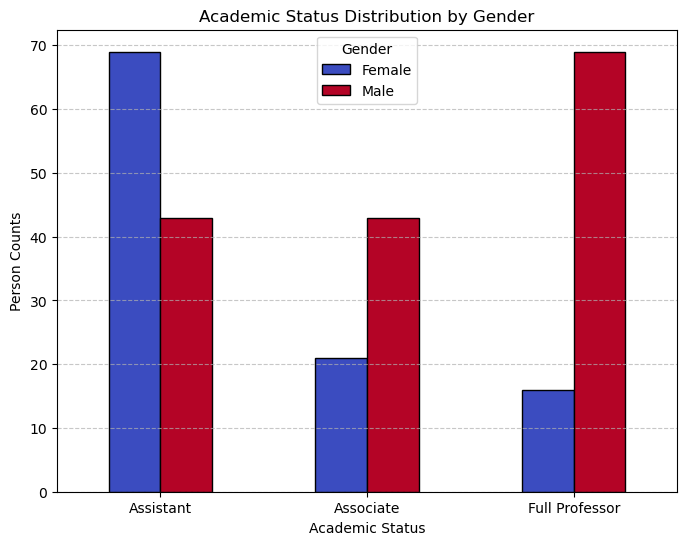

In [44]:
rank_gender_counts.plot(kind="bar", figsize=(8, 6), colormap="coolwarm", edgecolor="black")

plt.title("Academic Status Distribution by Gender")
plt.xlabel("Academic Status")
plt.ylabel("Person Counts")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()